#### Note
<!--BOOK_INFORMATION-->
*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

# NumPy Basics 3

## Computation on NumPy Arrays: Universal Functions
Computation on NumPy arrays can be very fast, or it can be very slow. The key to making it fast is to use vectorized operations, generally implemented through NumPy's universal functions (ufuncs). This section motivates the need for NumPy's ufuncs, which can be used to make repeated calculations on array elements much more efficient. It then introduces many of the most common and useful arithmetic ufuncs available in the NumPy package.

Due to the Python's dynamic, interpreted nature of the language, it first examines the object's type and does a dynamic lookup of the correct function to use for that type. If we were working in compiled code instead, this type specification would be known before the code executes and the result could be computed much more efficiently.

In [20]:
import numpy  as np


In [3]:
# For Example the following reciprocals take alomst seconds per loop

import numpy as np
np.random.seed(0)

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output
        
values = np.random.randint(1, 10, size=5)
%timeit compute_reciprocals(values)

12.7 µs ± 121 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Introducing UFuncs

In [23]:
print(compute_reciprocals(values))
print(1.0 / values)

[0.16666667 1.         0.25       0.25       0.125     ]
[0.16666667 1.         0.25       0.25       0.125     ]


In [24]:
%timeit (1.0 / values)

1.27 µs ± 27.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [33]:
### Array arithmetic
x = np.arange(4)
print("x     =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2)  # floor division
print("-x     = ", -x)
print("x ** 2 = ", x ** 2)
print("x % 2  = ", x % 2)
print(-(0.5*x + 1) ** 2)

x     = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]
-x     =  [ 0 -1 -2 -3]
x ** 2 =  [0 1 4 9]
x % 2  =  [0 1 0 1]
[-1.   -2.25 -4.   -6.25]


In [34]:
# the + operator is a wrapper for the add function:
np.add(x, 2)

array([2, 3, 4, 5])

The following table lists the arithmetic operators implemented in NumPy:

| Operator	    | Equivalent ufunc    | Description                           |
|---------------|---------------------|---------------------------------------|
|``+``          |``np.add``           |Addition (e.g., ``1 + 1 = 2``)         |
|``-``          |``np.subtract``      |Subtraction (e.g., ``3 - 2 = 1``)      |
|``-``          |``np.negative``      |Unary negation (e.g., ``-2``)          |
|``*``          |``np.multiply``      |Multiplication (e.g., ``2 * 3 = 6``)   |
|``/``          |``np.divide``        |Division (e.g., ``3 / 2 = 1.5``)       |
|``//``         |``np.floor_divide``  |Floor division (e.g., ``3 // 2 = 1``)  |
|``**``         |``np.power``         |Exponentiation (e.g., ``2 ** 3 = 8``)  |
|``%``          |``np.mod``           |Modulus/remainder (e.g., ``9 % 4 = 1``)|


In [35]:
### Trigonometric functions
theta = np.linspace(0, np.pi, 3)
print("theta      = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

theta      =  [0.         1.57079633 3.14159265]
sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [36]:
### Exponents and logarithms
x = [1, 2, 3]
print("x     =", x)
print("e^x   =", np.exp(x))
print("2^x   =", np.exp2(x))
print("3^x   =", np.power(3, x))

x     = [1, 2, 3]
e^x   = [ 2.71828183  7.3890561  20.08553692]
2^x   = [2. 4. 8.]
3^x   = [ 3  9 27]


### Aggregations: Min, Max, and Everything In Between

In [38]:
# Multi dimensional aggregates
m = np.random.random((3, 4))
print(m)
m.sum()

[[0.0202184  0.83261985 0.77815675 0.87001215]
 [0.97861834 0.79915856 0.46147936 0.78052918]
 [0.11827443 0.63992102 0.14335329 0.94466892]]


7.367010238828896

In [39]:
m.min(axis=0)

array([0.0202184 , 0.63992102, 0.14335329, 0.78052918])

In [40]:
m.max(axis=1)

array([0.87001215, 0.97861834, 0.94466892])

The following table provides a list of useful aggregation functions available in NumPy:

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute median of elements                    |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |


### Example: What is the Average Height of US Presidents?

In [42]:
!head -4 ../data/president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


In [44]:
import pandas as pd
data = pd.read_csv('../data/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [45]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193


In [46]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

25th percentile:    174.25
Median:             182.0
75th percentile:    183.0


In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style

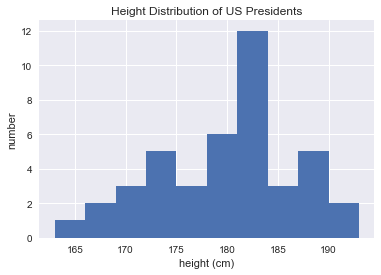

In [49]:
# These aggregates are some of the fundamental pieces of exploratory data analysis
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');

In [51]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [52]:
a[:, np.newaxis]

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [53]:
a - a

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [54]:
a - a[:, np.newaxis]

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [-1,  0,  1,  2,  3,  4,  5,  6,  7,  8],
       [-2, -1,  0,  1,  2,  3,  4,  5,  6,  7],
       [-3, -2, -1,  0,  1,  2,  3,  4,  5,  6],
       [-4, -3, -2, -1,  0,  1,  2,  3,  4,  5],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-6, -5, -4, -3, -2, -1,  0,  1,  2,  3],
       [-7, -6, -5, -4, -3, -2, -1,  0,  1,  2],
       [-8, -7, -6, -5, -4, -3, -2, -1,  0,  1],
       [-9, -8, -7, -6, -5, -4, -3, -2, -1,  0]])

In [55]:
a[:, np.newaxis] - a[:, np.newaxis]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [56]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [57]:
X[:, np.newaxis, :]

array([[[6, 3, 7, 4, 6, 9]],

       [[2, 6, 7, 4, 3, 7]],

       [[7, 2, 5, 4, 1, 7]],

       [[5, 1, 4, 0, 9, 5]]])

In [58]:
X[:, np.newaxis, :].shape

(4, 1, 6)

In [59]:
X.shape

(4, 6)

In [36]:
X = np.random.rand(10, 2)

In [34]:
X

array([[0.96366276, 0.38344152],
       [0.79172504, 0.52889492],
       [0.56804456, 0.92559664],
       [0.07103606, 0.0871293 ],
       [0.0202184 , 0.83261985],
       [0.77815675, 0.87001215],
       [0.97861834, 0.79915856],
       [0.46147936, 0.78052918],
       [0.11827443, 0.63992102],
       [0.14335329, 0.94466892]])

In [38]:
X - X[np.newaxis, :, :]

array([[[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]]])